In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
# necessary for the plot to appear in a Jupyter
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Populating the interactive namespace from numpy and matplotlib


In [2]:

#PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP500PR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP500HR.csv")

#PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP17NewsAgHR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP17NewsAgHR.csv")

PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/GOOG/PR.csv")
HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/GOOG/HR.csv")


RT = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/GOOG/RAW.csv")
FT = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/GOOG/FIN.csv")

In [3]:
# This is data set of previously financially filtered data.Empty 
# tone suggests that at that time no financial info was available about such so the value is 0
PR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = PR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
HR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = HR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
RT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = RT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
FT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = FT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)

In [4]:
len(PR)

9310

In [5]:
PR.head()

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
0,2016-02-29 00:30:00,-3.846154,3.550296,7.396450,10.946746,27.218935,0.000000,NaN,0.000934
1,2016-02-29 00:45:00,-1.112419,2.326808,3.439226,5.766034,23.044990,2.003371,NaN,0.000018
2,2016-02-29 01:00:00,-0.084602,1.861252,1.945854,3.807107,18.274112,0.592217,NaN,0.000001
3,2016-02-29 01:15:00,-0.712746,2.364060,3.076806,5.440866,22.415614,0.647727,NaN,0.000025
4,2016-02-29 01:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


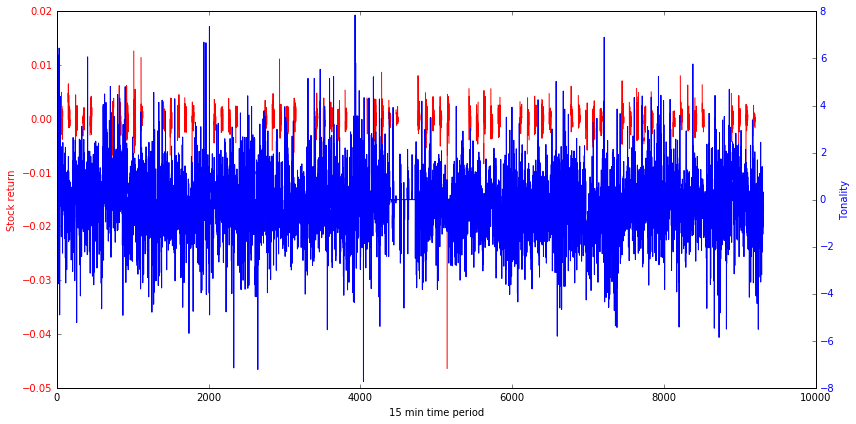

In [6]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(FT.tone)+1, 1)
tone = FT.tone
s_return = FT.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, s_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
print(adfuller(HR.tone))
# diff_tn = HR.tone.diff(1)
# HR.tone = diff_tn
# HR = HR[1:]
# HR.reset_index(drop=True)
# adfuller(HR.tone)

(-12.313935154872318, 6.99051246238795e-23, 29, 9280, {'10%': -2.566935808479953, '1%': -3.4310548609653635, '5%': -2.8618515039563515}, 30826.608600457508)


In [9]:
print(adfuller(PR.tone))
# diff_tn = PR.tone.diff(1)
# PR.tone = diff_tn
# PR = PR[1:]
# PR.reset_index(drop=True)
# adfuller(PR.tone)

(-19.909874064491557, 0.0, 13, 9296, {'10%': -2.5669355230392616, '1%': -3.4310536474442865, '5%': -2.8618509677203163}, 36283.27783587145)


In [10]:
print(adfuller(RT.tone))
# diff_tn = RT.tone.diff(1)
# RT.tone = diff_tn
# RT = RT[1:]
# RT.reset_index(drop=True)
# adfuller(RT.tone)

(-10.256301683903976, 4.3522566436672864e-18, 27, 9283, {'10%': -2.5669357548848586, '1%': -3.431054633111431, '5%': -2.8618514032712694}, 14432.743274101)


In [11]:
print(adfuller(FT.tone))
# diff_tn = FT.tone.diff(1)
# FT.tone = diff_tn
# FT = FT[1:]
# FT.reset_index(drop=True)
# adfuller(FT.tone)

(-12.283026605932966, 8.142255954683265e-23, 29, 9281, {'10%': -2.5669357906110712, '1%': -3.431054784997681, '5%': -2.8618514703874243}, 30544.973670603224)


In [12]:
# PR.to_csv("PR.csv",  index=False)
# HR.to_csv("HR.csv",  index=False)
# RT.to_csv("RAW.csv",  index=False)
# FT.to_csv("FIN.csv",  index=False)

#PR.loc[abs(PR['weight']) < 0.001, 'tone'] = 0
#HR.loc[abs(HR['weight']) > 0.0005, 'tone'] = 0

In [13]:
PR.head()

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
0,2016-02-29 00:30:00,-3.846154,3.550296,7.396450,10.946746,27.218935,0.000000,NaN,0.000934
1,2016-02-29 00:45:00,-1.112419,2.326808,3.439226,5.766034,23.044990,2.003371,NaN,0.000018
2,2016-02-29 01:00:00,-0.084602,1.861252,1.945854,3.807107,18.274112,0.592217,NaN,0.000001
3,2016-02-29 01:15:00,-0.712746,2.364060,3.076806,5.440866,22.415614,0.647727,NaN,0.000025
4,2016-02-29 01:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


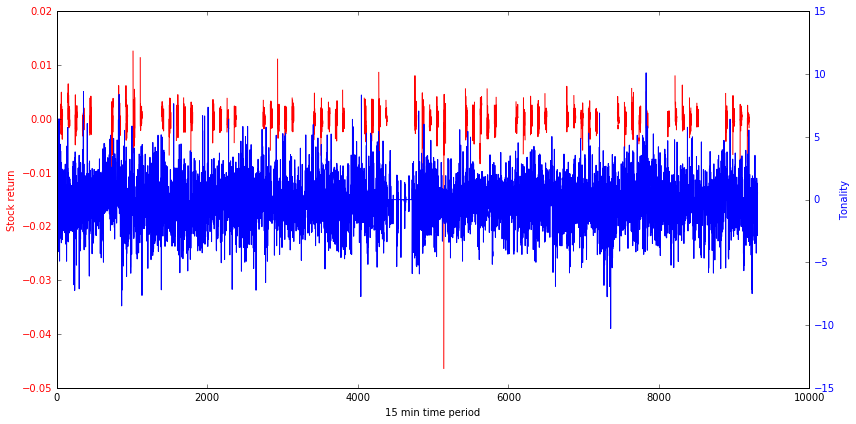

In [14]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(PR.tone)+1, 1)
tone = PR.tone
s_return = PR.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, s_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Stock return & Tone  Pearson correlation

In [15]:

print("Raw:  " + str(RT[['tone', 'fin_return']].corr().values[0][1]))
print("Financial:  " + str(FT[['tone', 'fin_return']].corr().values[0][1]))
print("Financial & Harmonics:  " + str(HR[['tone', 'fin_return']].corr().values[0][1]))
print("Financial & Page Rank:  " + str(PR[['tone', 'fin_return']].corr().values[0][1]))

Raw:  -0.011146206999100555
Financial:  0.014123430510579533
Financial & Harmonics:  0.015372489105816229
Financial & Page Rank:  0.01783969396835072


## Previous Time Stamp observation

In [16]:
from pandas.plotting import lag_plot
def plot_logs(datafr= None):

    matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3,figsize=(15, 15)) 

    lag_plot(datafr.tone, ax=ax1)
    lag_plot(datafr.polarity, ax=ax2)
    lag_plot(datafr.positive, ax=ax3)
    lag_plot(datafr.negative, ax=ax4)
    lag_plot(datafr.activ_den, ax=ax5)
    lag_plot(datafr.self_den, ax=ax6)

    ax1.set_title("Tone")
    ax2.set_title("Polarity")
    ax3.set_title("Positive")
    ax4.set_title("Negative")
    ax5.set_title("Active dencity")
    ax6.set_title("Self-dencity")

    fig.tight_layout()

###  RAW

In [17]:
#plot_logs(RT)

### Financial

In [18]:
#plot_logs(FT)

### Financial & Page Rank

In [19]:
#plot_logs(PR)

### Financial & Harmonics

In [20]:
#plot_logs(HR)

## Tone Autocorrelation

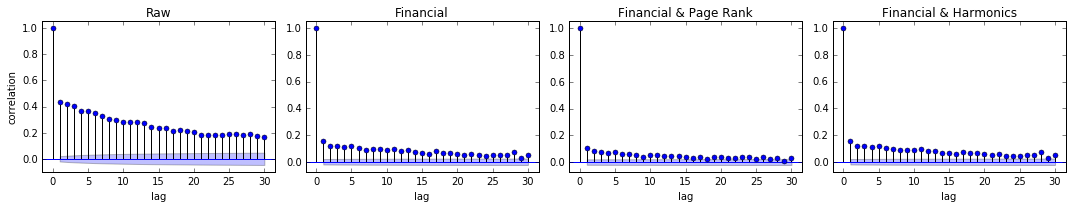

In [21]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(ncols=4, nrows=1,figsize=(15, 3)) 

plot_acf(RT.tone,  lags=30, ax=ax1)
plot_acf(FT.tone,  lags=30, ax=ax2)
plot_acf(PR.tone,  lags=30, ax=ax3)
plot_acf(HR.tone,  lags=30, ax=ax4)


ax1.set_title("Raw")
ax2.set_title("Financial")
ax3.set_title("Financial & Page Rank")
ax4.set_title("Financial & Harmonics")

ax1.set_xlabel('lag')
ax1.set_ylabel('correlation')
ax2.set_xlabel('lag')
ax3.set_xlabel('lag')
ax4.set_xlabel('lag')


fig.tight_layout()

## TONE & Stock Return cross-correlation

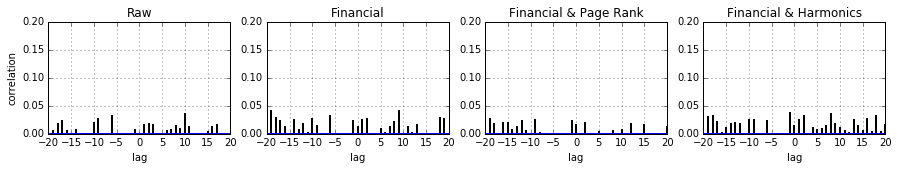

In [22]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(ncols=4, nrows=1,figsize=(15, 2))

ax1.xcorr(RT[RT.fin_return.notnull()].tone, RT[RT.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax1.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax1.grid(True)
ax1.set_ylim([0, 0.2])
ax1.set_title("Raw")
ax1.set_xlabel('lag')
ax1.set_ylabel('correlation')

ax2.xcorr(FT[FT.fin_return.notnull()].tone, FT[FT.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax2.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax2.grid(True)
ax2.set_ylim([0, 0.2])
ax2.set_title("Financial")
ax2.set_xlabel('lag')

ax3.xcorr(PR[PR.fin_return.notnull()].tone, PR[PR.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax3.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax3.grid(True)
ax3.set_ylim([0, 0.2])
ax3.set_title("Financial & Page Rank")
ax3.set_xlabel('lag')

ax4.xcorr(HR[HR.fin_return.notnull()].tone, HR[HR.fin_return.notnull()].fin_return, usevlines=True, normed=True, maxlags=20, lw=2)
ax4.grid(True)
ax4.axhline(0.2, color='blue', linestyle='dashed', lw=2)
ax4.set_ylim([0, 0.2])
ax4.set_title("Financial & Harmonics")
ax4.set_xlabel('lag')


In [23]:
fil_PR = PR[PR.fin_return.notnull()][:100]

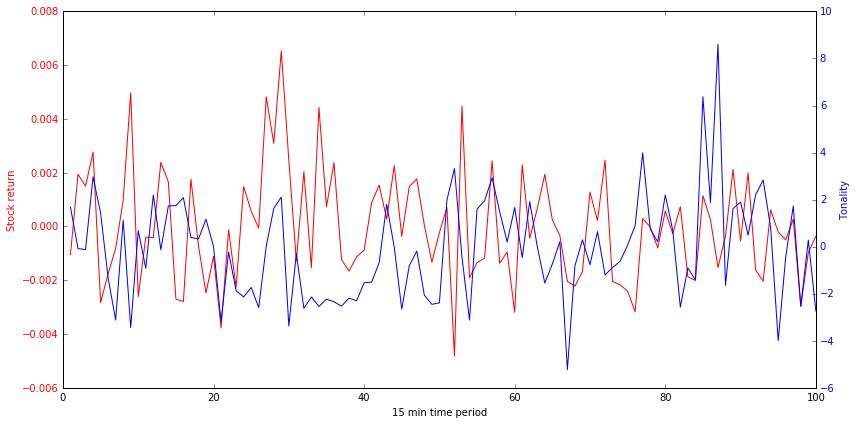

In [24]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(fil_PR.tone)+1, 1)
tone = fil_PR.tone
s_return = fil_PR.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, fil_PR.fin_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [25]:
len(RT)

9311

#### Changing  data

In [26]:
fin_PR = PR[PR.fin_return.notna()].reset_index(drop = True)

In [27]:
len(fin_PR)

1608

In [28]:
sample = fin_PR[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]
sample.head()

,tone,polarity,fin_return,positive,negative,activ_den,self_den
0,1.674729,2.928148,-0.001042,2.301438,0.626710,20.323118,3.968939
1,-0.081988,5.763951,0.001943,2.840982,2.922969,23.408055,0.892783
2,-0.123690,4.290516,0.001499,2.083413,2.207103,23.390098,0.973522
3,2.970759,8.144415,0.002772,5.557587,2.586828,24.451111,0.996315
4,1.428060,6.578098,-0.002836,4.003079,2.575019,20.442221,1.035043


In [29]:
sample['shift_1_return'] = sample['fin_return'].shift(1)
sample = sample[1:].reset_index(drop=True)

/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
sample.head()

,tone,polarity,fin_return,positive,negative,activ_den,self_den,shift_1_return
0,-0.081988,5.763951,0.001943,2.840982,2.922969,23.408055,0.892783,-0.001042
1,-0.123690,4.290516,0.001499,2.083413,2.207103,23.390098,0.973522,0.001943
2,2.970759,8.144415,0.002772,5.557587,2.586828,24.451111,0.996315,0.001499
3,1.428060,6.578098,-0.002836,4.003079,2.575019,20.442221,1.035043,0.002772
4,-1.329902,7.932197,-0.001764,3.301148,4.631050,22.426089,1.480510,-0.002836


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample[['tone', 'polarity', 'shift_1_return', 'positive', 'negative']], sample.fin_return.values, test_size=0.10, shuffle = False)

In [32]:
from sklearn.metrics import r2_score
reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train, y_train))

[ 5.91143947e+09 -3.08524877e+09  6.76618726e-02 -2.82619070e+09
  8.99668824e+09]
-0.00042991659543638555
0.007344327733111999


In [33]:
len(y_train)

1446

In [34]:
res = reg.predict(X_test)

In [35]:
#plt.plot(res, label="predicted")

In [36]:
#plt.plot(y_test, color="red")

In [37]:
# plt.plot(res.reshape(-1, 1)[:160], label="predicted")
# plt.plot(y_test.tolist()[:160], label= "actual", color="red")
# plt.plot([np.mean(y_train) for i in range(len(y_test.tolist()))][:160], label= "mean", color="green")
# plt.xlabel("15 minute time period")
# plt.ylabel("Stock return")
# pylab.legend(loc='upper left')

In [38]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(res.reshape(-1, 1), y_test.tolist())
mse2 = mean_squared_error([np.mean(y_train) for i in range(len(y_test.tolist()))], y_test.tolist())

In [39]:
#mse1 = mean_squared_error(y_train.tolist(), res.reshape(-1, 1) )
#mse2 = mean_squared_error(y_train.tolist(), [np.mean(y_train) for i in range(len(y_train.tolist()))])

In [40]:
mse2 *1000

0.0034894993072479533

In [41]:
mse1 *1000

0.0035313436991846374

In [42]:
#X_train

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_new = SelectKBest(f_regression, k=3).fit_transform(X_train, y_train)

In [44]:
X_new

array([[ 5.76395096e+00, -1.04205730e-03,  2.84098154e+00],
       [ 4.29051622e+00,  1.94264440e-03,  2.08341298e+00],
       [ 8.14441474e+00,  1.49917848e-03,  5.55758702e+00],
       ...,
       [ 4.86734361e+00,  6.30702522e-03,  2.67296571e+00],
       [ 4.37468508e+00,  1.32701441e-03,  2.22289296e+00],
       [ 4.12625523e+00, -1.63871188e-03,  1.77980314e+00]])

In [45]:
f_regression(X_train, y_train)

(array([0.69948545, 1.86970484, 6.93010511, 3.33044367, 0.02854787]),
 array([0.40309502, 0.17172168, 0.00856606, 0.06821504, 0.86585086]))

In [46]:
float(6.93016740e-05*100)

0.006930167399999999

In [47]:
# #### matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# # Create some mock data
# t = np.arange(1, len(y_test.tolist())+1, 1)
# act = y_test.tolist()
# pred = res.reshape(-1).tolist()

# fig, ax1 = plt.subplots()

# color = 'red'
# ax1.set_xlabel('15 min time period')
# ax1.set_ylabel('actual', color=color)
# ax1.plot(t, act, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'blue'
# ax2.set_ylabel('predicted', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, pred, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

## Quantile Regression

In [48]:
def quant_reg_plot(dataFR, feature):
    
    mod = smf.quantreg( 'fin_return ~ '+ feature, dataFR)

    quantiles = np.arange(0.1, 1, 0.05)

    models = []
    params = []

    for qt in quantiles:
        res = mod.fit(q = qt)
        models.append(res)
        params.append([qt, res.params['Intercept'], res.params[feature]] + res.conf_int().loc[feature].tolist())
    params = pd.DataFrame(data=params, columns=['qt', 'inter', 'x_coef', 'lower_percentile', 'upper_percentile'])
    
    return params

In [49]:
PR = PR[PR.fin_return.notna()].reset_index(drop = True)
HR = HR[HR.fin_return.notna()].reset_index(drop = True)
FT = FT[FT.fin_return.notna()].reset_index(drop = True)
RT = RT[RT.fin_return.notna()].reset_index(drop = True)

In [50]:
lag_PR = PR[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]
lag_HR = HR[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]
lag_FT = FT[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]
lag_RT = RT[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]


lag_PR['shift_1_return'] = lag_PR['fin_return'].shift(1)
lag_PR = lag_PR[1:].reset_index(drop=True)

lag_HR['shift_1_return'] = lag_HR['fin_return'].shift(1)
lag_HR = lag_HR[1:].reset_index(drop=True)

lag_FT['shift_1_return'] = lag_FT['fin_return'].shift(1)
lag_FT = lag_FT[1:].reset_index(drop=True)

lag_RT['shift_1_return'] = lag_RT['fin_return'].shift(1)
lag_RT= lag_RT[1:].reset_index(drop=True)

/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


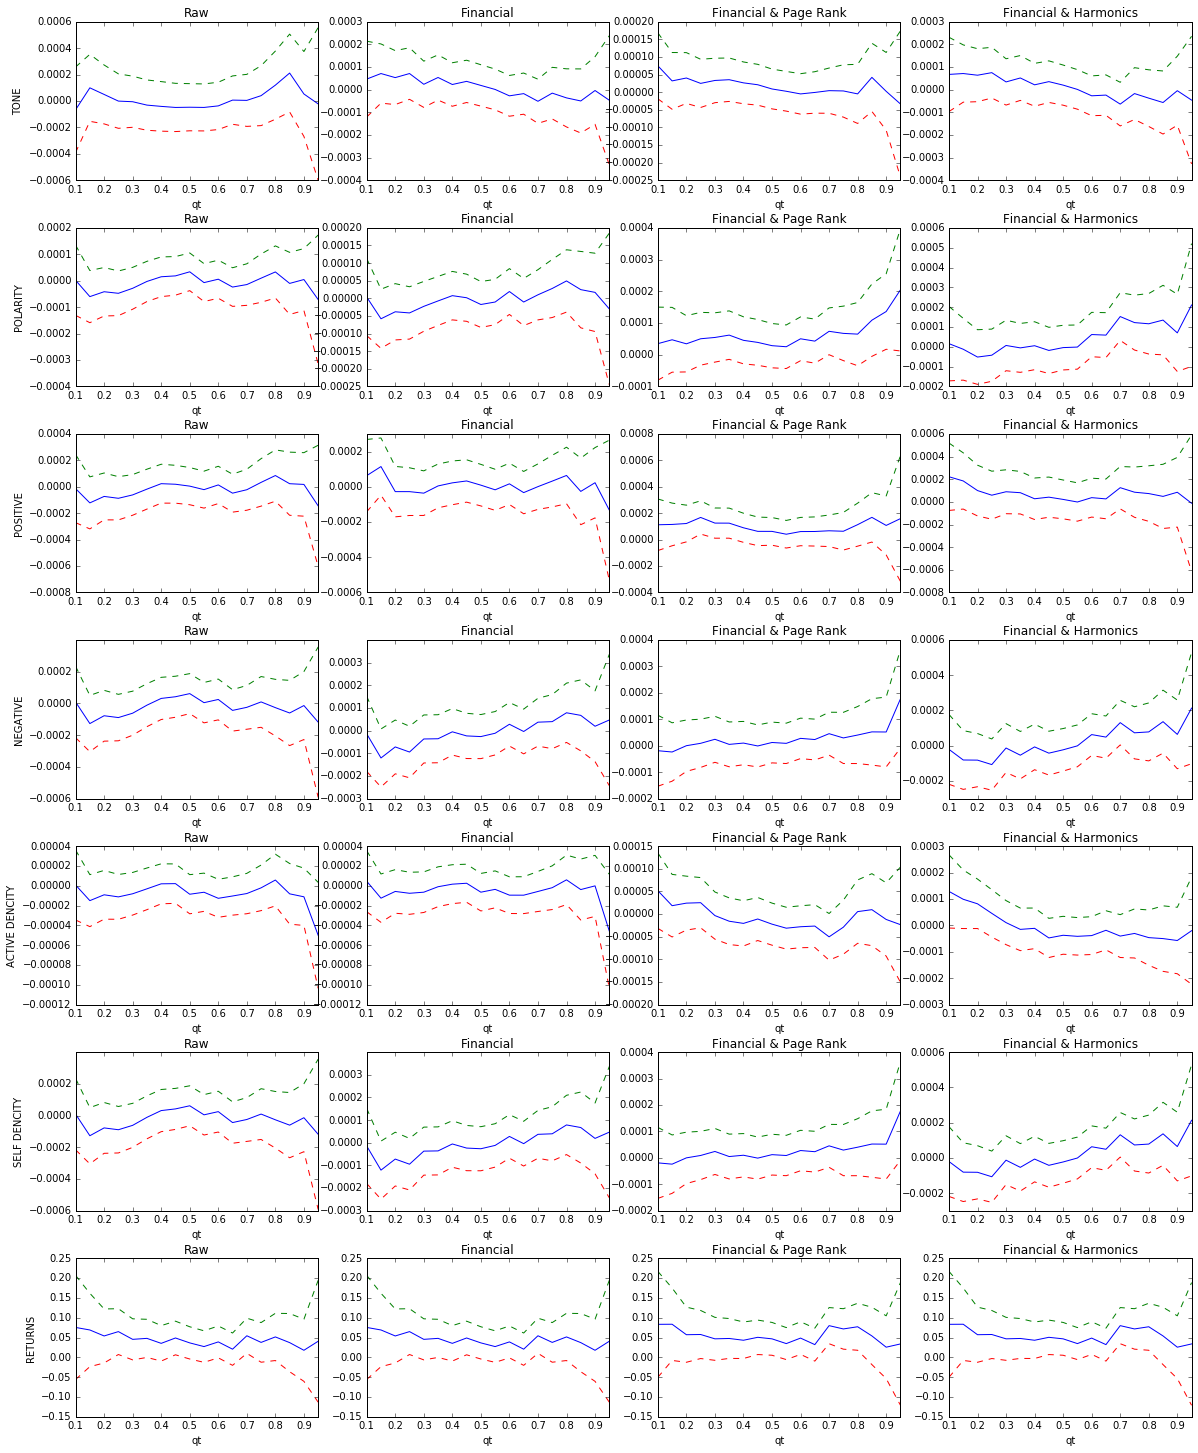

In [51]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20), (ax21, ax22, ax23, ax24), (ax25, ax26, ax27, ax28)) = plt.subplots(ncols=4, nrows=7,figsize=(20, 25))


quant_reg_plot(RT, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax1, legend=False)
quant_reg_plot(FT, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax2, legend=False)
quant_reg_plot(PR, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax3, legend=False)
quant_reg_plot(HR, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax4, legend=False)

ax1.set_ylabel("TONE")
ax1.set_title("Raw")
ax2.set_title("Financial")
ax3.set_title("Financial & Page Rank")
ax4.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax5, legend=False)
quant_reg_plot(FT, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax6, legend=False)
quant_reg_plot(PR, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax7, legend=False)
quant_reg_plot(HR, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax8, legend=False)

ax5.set_ylabel("POLARITY")
ax5.set_title("Raw")
ax6.set_title("Financial")
ax7.set_title("Financial & Page Rank")
ax8.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax9, legend=False)
quant_reg_plot(FT, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax10, legend=False)
quant_reg_plot(PR, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax11, legend=False)
quant_reg_plot(HR, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax12, legend=False)

ax9.set_ylabel("POSITIVE")
ax9.set_title("Raw")
ax10.set_title("Financial")
ax11.set_title("Financial & Page Rank")
ax12.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax13, legend=False)
quant_reg_plot(FT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax14, legend=False)
quant_reg_plot(PR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax15, legend=False)
quant_reg_plot(HR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax16, legend=False)

ax13.set_ylabel("NEGATIVE")
ax13.set_title("Raw")
ax14.set_title("Financial")
ax15.set_title("Financial & Page Rank")
ax16.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax17, legend=False)
quant_reg_plot(FT, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax18, legend=False)
quant_reg_plot(PR, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax19, legend=False)
quant_reg_plot(HR, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax20, legend=False)

ax17.set_ylabel("ACTIVE DENCITY")
ax17.set_title("Raw")
ax18.set_title("Financial")
ax19.set_title("Financial & Page Rank")
ax20.set_title("Financial & Harmonics")


quant_reg_plot(RT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax21, legend=False)
quant_reg_plot(FT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax22, legend=False)
quant_reg_plot(PR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax23, legend=False)
quant_reg_plot(HR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax24, legend=False)

ax21.set_ylabel("SELF DENCITY")
ax21.set_title("Raw")
ax22.set_title("Financial")
ax23.set_title("Financial & Page Rank")
ax24.set_title("Financial & Harmonics")


quant_reg_plot(lag_RT, 'shift_1_return').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax25, legend=False)
quant_reg_plot(lag_FT, 'shift_1_return').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax26, legend=False)
quant_reg_plot(lag_PR, 'shift_1_return').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax27, legend=False)
quant_reg_plot(lag_HR, 'shift_1_return').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax28, legend=False)

ax25.set_ylabel("RETURNS")
ax25.set_title("Raw")
ax26.set_title("Financial")
ax27.set_title("Financial & Page Rank")
ax28.set_title("Financial & Harmonics")



fig.subplots_adjust(hspace=0.3)

 ## Autoregression

In [52]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [53]:
#prediction for the next 4 ours of 16 lags
fin_ret = PR.fin_return.values.tolist()
train, test = fin_ret[1:len(fin_ret)-28], fin_ret[len(fin_ret)-28:]

In [54]:
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 5.86593686e-06  6.92528798e-02 -4.36415245e-03  5.36973207e-03
  3.93646509e-03 -3.82175419e-02  2.88493251e-03  9.71136293e-03
  1.39070841e-02  1.65571005e-02  9.09571939e-03 -2.59643783e-03
 -3.18653819e-02 -8.07733949e-03 -3.05781216e-02  3.51641226e-02
 -2.02906555e-02  1.51498577e-02  8.43938394e-03  2.75678254e-02
 -1.99077381e-02 -5.04877100e-03 -9.26153982e-02  3.26199432e-02
  2.71805082e-02]


predicted=-0.000294, expected=-0.001226
predicted=-0.000109, expected=0.001329
predicted=0.000178, expected=0.000335
predicted=0.000294, expected=0.000787
predicted=0.001020, expected=-0.000161
predicted=-0.000127, expected=-0.008051
predicted=-0.000655, expected=-0.001411
predicted=-0.000056, expected=0.000190
predicted=0.000090, expected=-0.003114
predicted=-0.000097, expected=0.002544
predicted=-0.000062, expected=-0.000114
predicted=0.000050, expected=-0.001041
predicted=0.000387, expected=0.001115
predicted=-0.000007, expected=0.001194
predicted=-0.000140, expected=0.001005
predicted=-0.000221, expected=-0.000397
predicted=0.000023, expected=-0.000380
predicted=0.000025, expected=-0.000353
predicted=-0.000010, expected=0.000937
predicted=-0.000083, expected=-0.000001
predicted=0.000011, expected=0.000707
predicted=0.000188, expected=-0.000675
predicted=0.000047, expected=-0.000140
predicted=-0.000011, expected=-0.000610
predicted=-0.000071, expected=0.000895
predicted=-0.000049, e

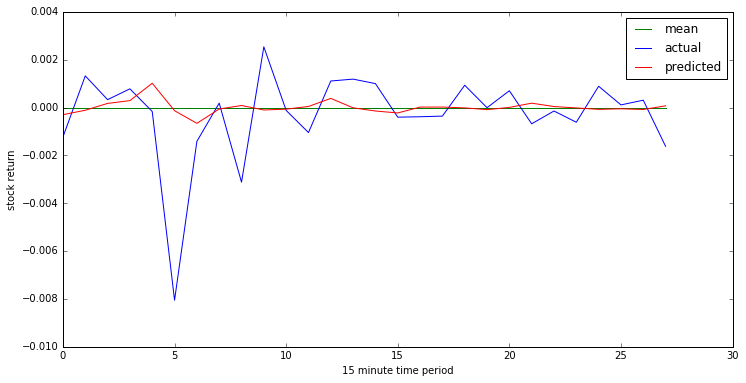

In [55]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)
# plot results
plt.xlabel("15 minute time period")
plt.ylabel("stock return")
pyplot.plot([np.mean(train) for i in range(len(test))], color='green')
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
pyplot.legend(["mean", "actual", "predicted"])
pyplot.show()

In [56]:
mean_squared_error([np.mean(train) for i in range(len(test))], test)

3.5015507960976645e-06

In [57]:
mean_squared_error(predictions, test)

3.4492685312359385e-06

## VAR process

In [58]:
from statsmodels.tsa.api import VAR, DynamicVAR

In [59]:
PR.head()

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
0,2016-02-29 13:45:00,1.674729,2.301438,0.626710,2.928148,20.323118,3.968939,-0.001042,0.000036
1,2016-02-29 14:00:00,-0.081988,2.840982,2.922969,5.763951,23.408055,0.892783,0.001943,0.000056
2,2016-02-29 14:15:00,-0.123690,2.083413,2.207103,4.290516,23.390098,0.973522,0.001499,0.000011
3,2016-02-29 14:30:00,2.970759,5.557587,2.586828,8.144415,24.451111,0.996315,0.002772,0.000588
4,2016-02-29 14:45:00,1.428060,4.003079,2.575019,6.578098,20.442221,1.035043,-0.002836,0.000612


In [84]:
model = VAR(PR[['tone','polarity','fin_return']])

In [85]:
results = model.fit(2)

In [86]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, May, 2019
Time:                     11:05:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -10.3143
Nobs:                     1606.00    HQIC:                  -10.3585
Log likelihood:           1523.41    FPE:                3.09041e-05
AIC:                     -10.3846    Det(Omega_mle):     3.05035e-05
--------------------------------------------------------------------
Results for equation tone
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.574427         0.237669            2.417           0.016
L1.tone               0.121131         0.026002            4.658           0.000
L1.polarity          -0.055418         0.032022           -1.

In [87]:
results.pvalues_dt

array([[1.56527216e-002, 2.81813281e-110, 3.14595052e-001]])

In [5]:
2.2e-3

0.0022

In [83]:
results.pvalues

,tone,polarity,fin_return
const,6.276763e-01,2.650963e-75,0.815130
L1.tone,2.247275e-56,7.618233e-01,0.599218
L1.polarity,2.041941e-01,3.397124e-29,0.759884
L1.fin_return,3.370139e-01,9.608962e-01,0.017593
L2.tone,3.452166e-24,6.133442e-01,0.661392
L2.polarity,6.737150e-01,4.628501e-19,0.546308
L2.fin_return,5.062725e-01,3.889823e-01,0.965919


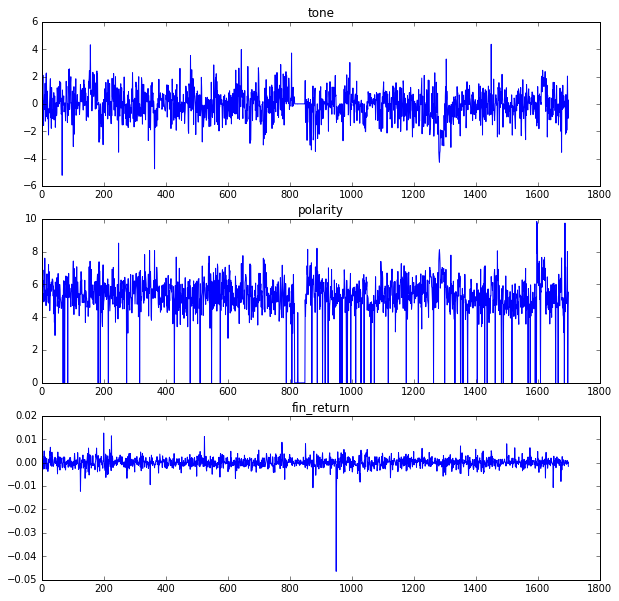

In [71]:
a = results.plot()